In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot



In [4]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [5]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [6]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [7]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [8]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [9]:

trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [10]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.3,random_state=100)

In [12]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]

# LSTM1

In [ ]:
# Model 1
model = Sequential()
model.add(LSTM(128, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70656     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 87942 (343.52 KB)
Trainable params: 87942 (343.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 10s 26ms/step - loss: 1.2357 - accuracy: 0.4752 - val_loss: 1.0075 - val_accuracy: 0.5748
Epoch 2/10
58/58 [==============================] - 1s 11ms/step - loss: 0.8684 - accuracy: 0.6330 - val_loss: 0.7066 - val_accuracy: 0.6931
Epoch 3/10
58/58 [==============================] - 1s 11ms/step - loss: 0.6496 - accuracy: 0.7259 - val_loss: 0.4770 - val_accuracy: 0.8105
Epoch 4/10
58/58 [==============================] - 1s 11ms/step - loss: 0.5327 - accuracy: 0.8029 - val_loss: 0.4064 - val_accuracy: 0.8572
Epoch 5/10
58/58 [==============================] - 1s 11ms/step - loss: 0.3677 - accuracy: 0.8742 - val_loss: 0.2503 - val_accuracy: 0.9207
Epoch 6/10
58/58 [==============================] - 1s 12ms/step - loss: 0.3440 - accuracy: 0.8849 - val_loss: 0.2042 - val_accuracy: 0.9334
Epoch 7/10
58/58 [==============================] - 1s 11ms/step - loss: 0.2036 - accuracy: 0.9270 - val_loss: 0.1562 - val_accuracy: 0.9506
Epoch 8/10
5

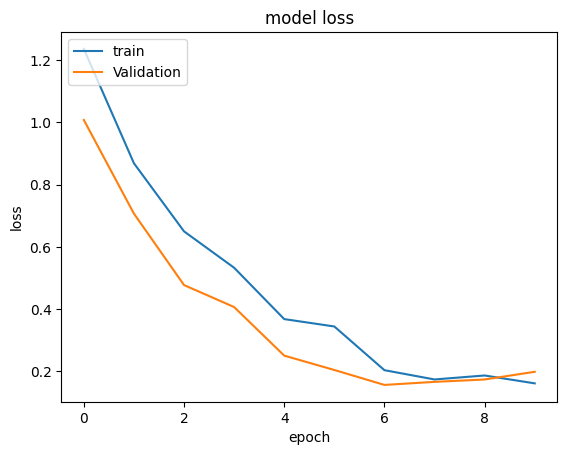

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

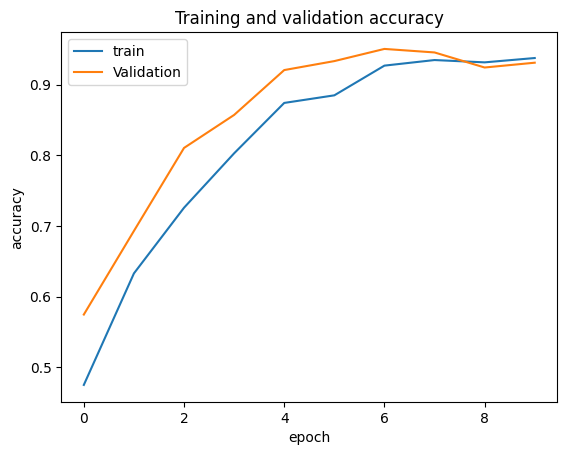

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 1s 3ms/step
[[398   9  30   0  59   0]
 [ 16 429  22   0   1   3]
 [  5  10 405   0   0   0]
 [  2  16   0 375  98   0]
 [  1   0   0  73 458   0]
 [  0  27   0   0   0 510]]
0.8737699355276553
0.8742431904933708
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       496
           1       0.87      0.91      0.89       471
           2       0.89      0.96      0.92       420
           3       0.84      0.76      0.80       491
           4       0.74      0.86      0.80       532
           5       0.99      0.95      0.97       537

    accuracy                           0.87      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.87      0.87      2947



<Axes: >

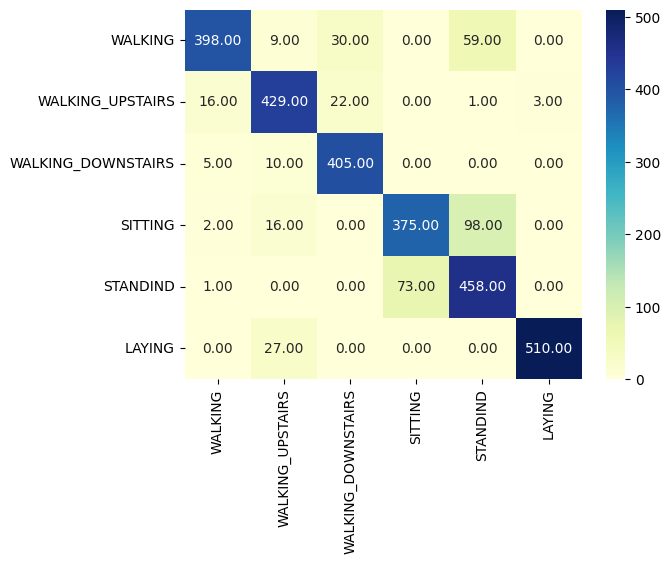

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# LSTM 2


In [ ]:
# Model 1
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128, 128)          70656     
                                                                 
 dropout_1 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                                 
Total params: 219526 (857.52 KB)
Trainable params: 219

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 7s 38ms/step - loss: 1.1658 - accuracy: 0.4989 - val_loss: 0.9169 - val_accuracy: 0.6129
Epoch 2/10
58/58 [==============================] - 1s 20ms/step - loss: 0.7597 - accuracy: 0.6676 - val_loss: 0.6788 - val_accuracy: 0.7176
Epoch 3/10
58/58 [==============================] - 1s 21ms/step - loss: 0.5835 - accuracy: 0.7591 - val_loss: 0.4681 - val_accuracy: 0.8241
Epoch 4/10
58/58 [==============================] - 1s 20ms/step - loss: 0.4086 - accuracy: 0.8534 - val_loss: 0.3057 - val_accuracy: 0.8849
Epoch 5/10
58/58 [==============================] - 1s 21ms/step - loss: 0.2789 - accuracy: 0.9089 - val_loss: 0.2739 - val_accuracy: 0.9062
Epoch 6/10
58/58 [==============================] - 1s 21ms/step - loss: 0.2714 - accuracy: 0.9093 - val_loss: 0.1829 - val_accuracy: 0.9415
Epoch 7/10
58/58 [==============================] - 1s 24ms/step - loss: 0.2038 - accuracy: 0.9270 - val_loss: 0.1772 - val_accuracy: 0.9402
Epoch 8/10
58

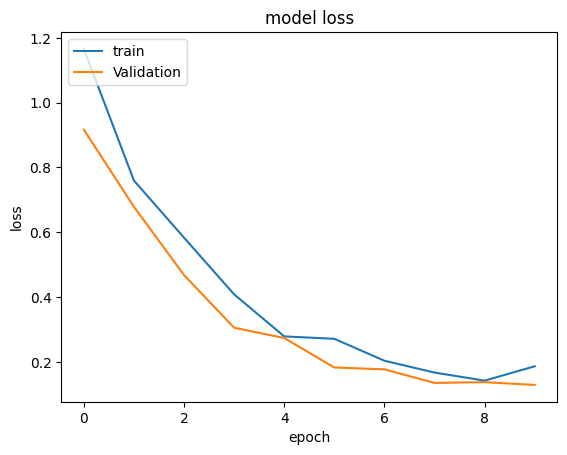

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

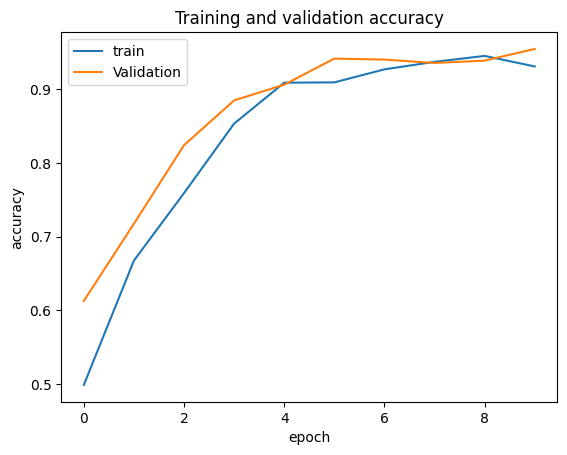

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 2s 6ms/step
[[455   9  32   0   0   0]
 [ 24 429  17   0   0   1]
 [  0   1 419   0   0   0]
 [ 22   4   0 385  80   0]
 [ 10   0   0 106 416   0]
 [  0  27   0   0   0 510]]
0.8870037326094333
0.8864100635808836
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       496
           1       0.91      0.91      0.91       471
           2       0.90      1.00      0.94       420
           3       0.78      0.78      0.78       491
           4       0.84      0.78      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.89      0.89      0.89      2947



<Axes: >

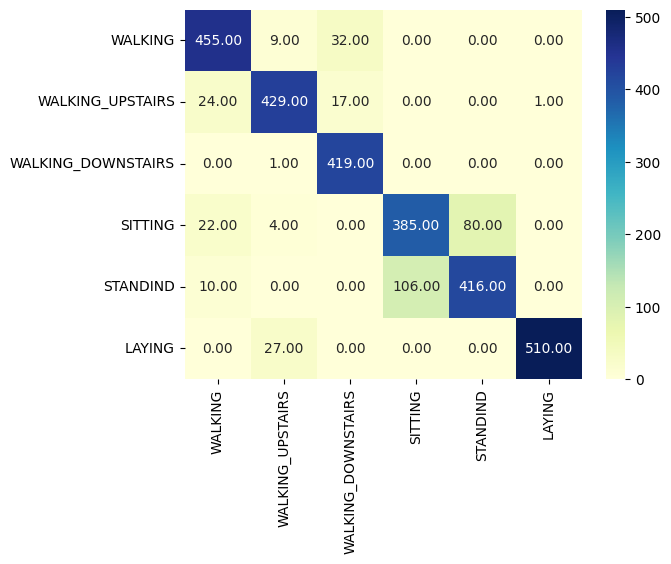

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# LSTM 3

In [ ]:
# Model 1
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128, 128)          70656     
                                                                 
 dropout_3 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_4 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 9s 50ms/step - loss: 1.1666 - accuracy: 0.5054 - val_loss: 0.8952 - val_accuracy: 0.6360
Epoch 2/10
58/58 [==============================] - 2s 32ms/step - loss: 0.7229 - accuracy: 0.6823 - val_loss: 0.7378 - val_accuracy: 0.6646
Epoch 3/10
58/58 [==============================] - 2s 31ms/step - loss: 0.5826 - accuracy: 0.7447 - val_loss: 0.5642 - val_accuracy: 0.7548
Epoch 4/10
58/58 [==============================] - 2s 34ms/step - loss: 0.5083 - accuracy: 0.7693 - val_loss: 0.5459 - val_accuracy: 0.7806
Epoch 5/10
58/58 [==============================] - 2s 31ms/step - loss: 0.4240 - accuracy: 0.8126 - val_loss: 0.2618 - val_accuracy: 0.9053
Epoch 6/10
58/58 [==============================] - 2s 33ms/step - loss: 0.2934 - accuracy: 0.9003 - val_loss: 0.2857 - val_accuracy: 0.9053
Epoch 7/10
58/58 [==============================] - 2s 33ms/step - loss: 0.2168 - accuracy: 0.9229 - val_loss: 0.1578 - val_accuracy: 0.9397
Epoch 8/10
58

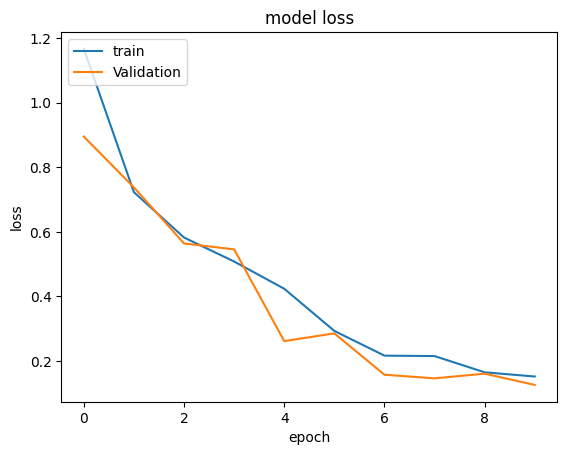

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

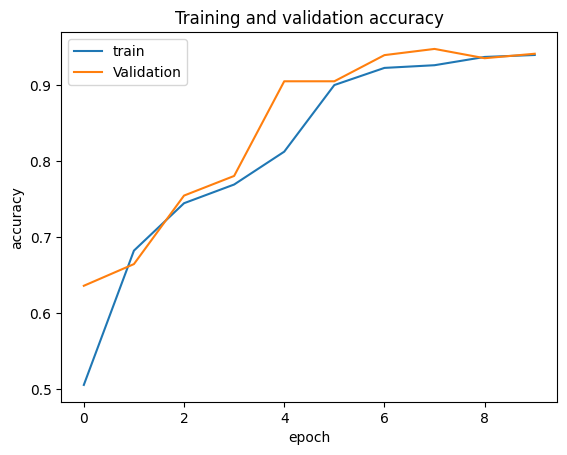

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 2s 9ms/step
[[467  25   4   0   0   0]
 [  5 431  35   0   0   0]
 [  0  12 408   0   0   0]
 [  1   4   0 369 112   5]
 [  1   1   0  60 470   0]
 [  0  27   0   0   0 510]]
0.9009161859518154
0.9007299665977592
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       496
           1       0.86      0.92      0.89       471
           2       0.91      0.97      0.94       420
           3       0.86      0.75      0.80       491
           4       0.81      0.88      0.84       532
           5       0.99      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

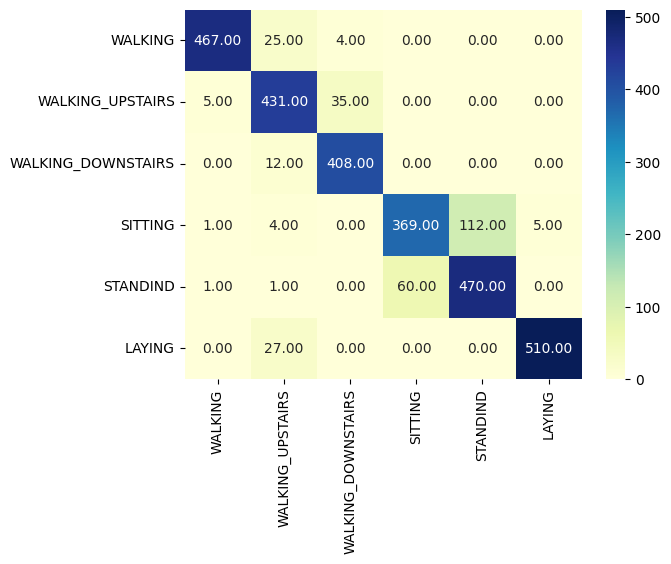

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# LSTM 4

In [ ]:
# Model 1
model = Sequential()
model.add(LSTM(128, return_sequences=True , input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True ))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128, 128)          70656     
                                                                 
 dropout_6 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_7 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_8 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_9 (LSTM)               (None, 128)              

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 12s 81ms/step - loss: 1.1526 - accuracy: 0.5064 - val_loss: 0.8051 - val_accuracy: 0.6355
Epoch 2/10
58/58 [==============================] - 2s 41ms/step - loss: 0.6915 - accuracy: 0.6878 - val_loss: 0.6006 - val_accuracy: 0.7285
Epoch 3/10
58/58 [==============================] - 2s 41ms/step - loss: 0.5741 - accuracy: 0.7354 - val_loss: 0.5042 - val_accuracy: 0.7566
Epoch 4/10
58/58 [==============================] - 2s 41ms/step - loss: 0.4757 - accuracy: 0.7695 - val_loss: 0.5232 - val_accuracy: 0.7616
Epoch 5/10
58/58 [==============================] - 2s 42ms/step - loss: 0.3774 - accuracy: 0.8255 - val_loss: 0.2261 - val_accuracy: 0.9071
Epoch 6/10
58/58 [==============================] - 2s 42ms/step - loss: 0.2774 - accuracy: 0.8938 - val_loss: 0.3559 - val_accuracy: 0.8758
Epoch 7/10
58/58 [==============================] - 2s 42ms/step - loss: 0.2332 - accuracy: 0.9202 - val_loss: 0.1326 - val_accuracy: 0.9529
Epoch 8/10
5

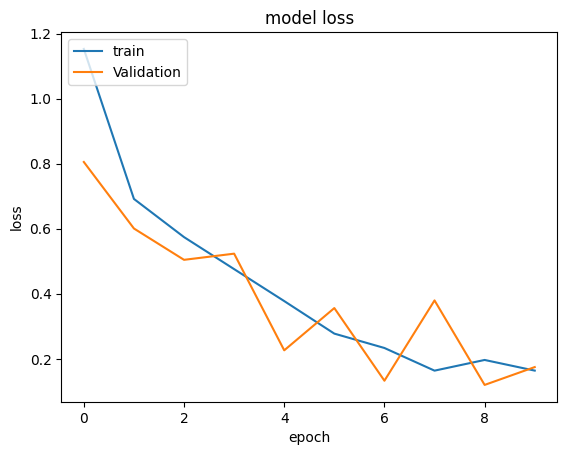

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

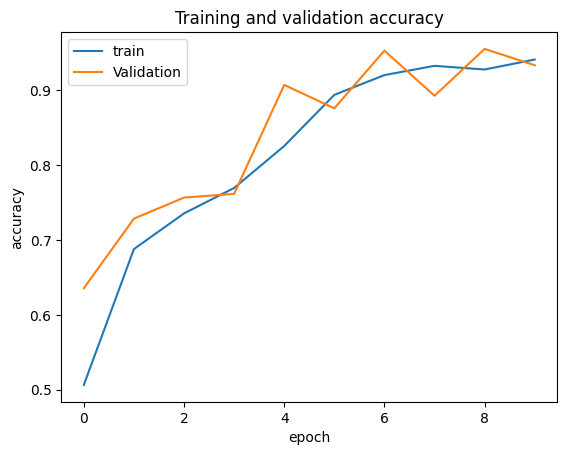

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 3s 12ms/step
[[462  11  23   0   0   0]
 [ 53 414   3   0   1   0]
 [  3   2 415   0   0   0]
 [  0   4   2 373 112   0]
 [  1   0   0  67 464   0]
 [  0  27   0   0   0 510]]
0.8951476077366813
0.8948154269749422
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       496
           1       0.90      0.88      0.89       471
           2       0.94      0.99      0.96       420
           3       0.85      0.76      0.80       491
           4       0.80      0.87      0.84       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.89      2947



<Axes: >

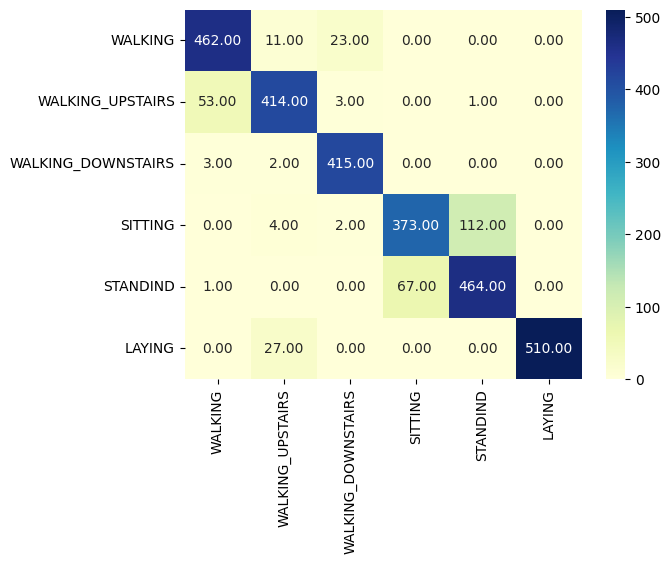

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# LSTM5

In [14]:
# Model 1
model = Sequential()
model.add(LSTM(128, return_sequences=True , input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True ))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128, 128)          70656     
                                                                 
 dropout_4 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_6 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_5 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 128, 128)          131584    
                                                                 
 dropout_6 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_8 (LSTM)               (None, 128, 128)         

In [15]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 26s 100ms/step - loss: 1.2007 - accuracy: 0.4927 - val_loss: 1.0087 - val_accuracy: 0.6020
Epoch 2/10
58/58 [==============================] - 3s 51ms/step - loss: 0.7246 - accuracy: 0.6824 - val_loss: 0.6156 - val_accuracy: 0.7253
Epoch 3/10
58/58 [==============================] - 3s 51ms/step - loss: 0.5735 - accuracy: 0.7393 - val_loss: 0.4540 - val_accuracy: 0.7752
Epoch 4/10
58/58 [==============================] - 3s 51ms/step - loss: 0.4703 - accuracy: 0.7769 - val_loss: 0.3726 - val_accuracy: 0.8250
Epoch 5/10
58/58 [==============================] - 3s 57ms/step - loss: 0.3720 - accuracy: 0.8294 - val_loss: 0.3181 - val_accuracy: 0.8391
Epoch 6/10
58/58 [==============================] - 3s 58ms/step - loss: 0.2879 - accuracy: 0.8969 - val_loss: 0.4929 - val_accuracy: 0.8228
Epoch 7/10
58/58 [==============================] - 3s 52ms/step - loss: 0.3535 - accuracy: 0.8803 - val_loss: 0.4119 - val_accuracy: 0.8173
Epoch 8/10


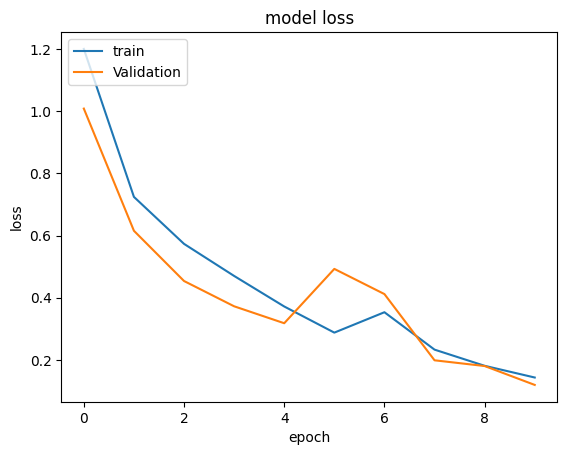

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

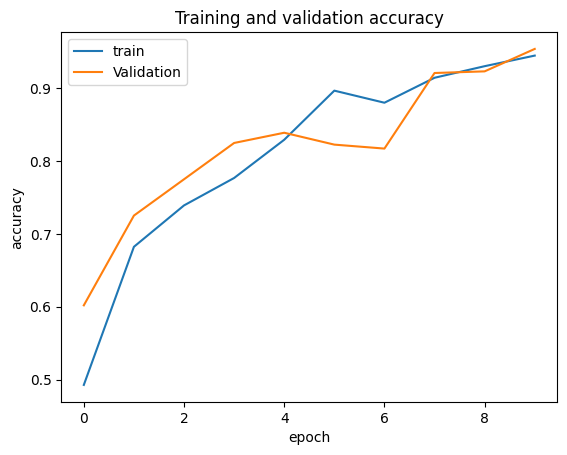

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')